#  Titanic Dataset
  - Renad Alahmadi
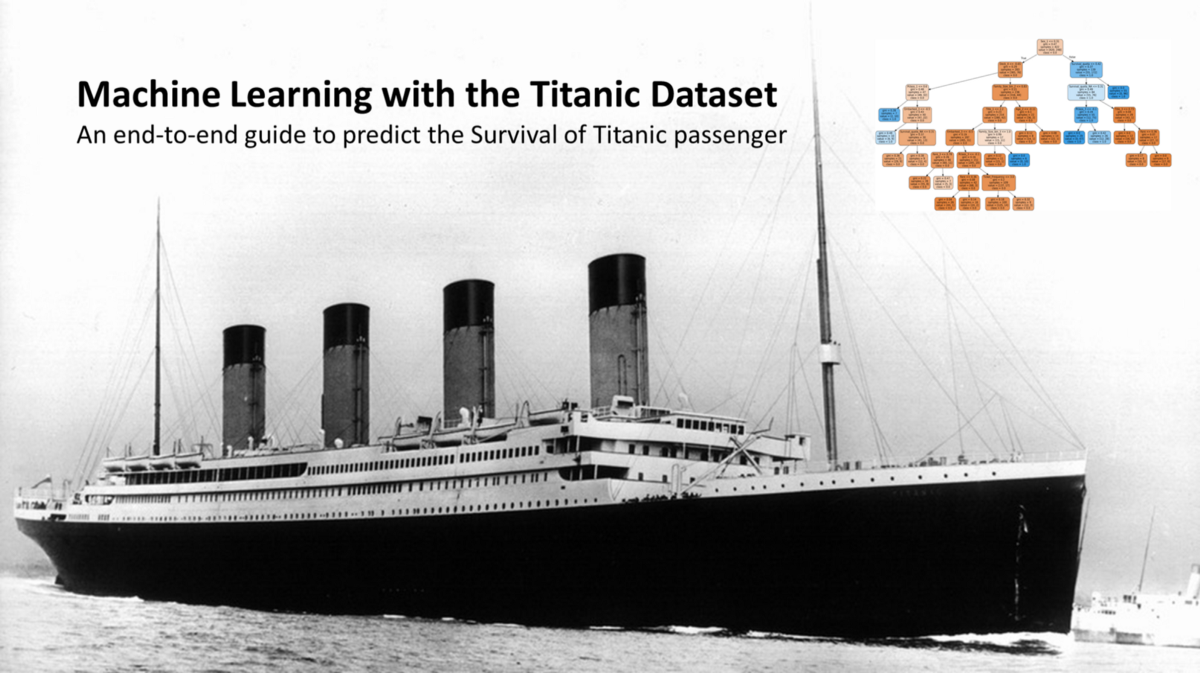

# Dataset Loading & Spliting


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cost Functions
from sklearn.metrics import confusion_matrix

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [166]:
# Load Data
df = pd.read_csv('titanic.csv')

In [167]:

# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [168]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [169]:
df.shape

(891, 15)

In [170]:
train.shape

(569, 15)

In [171]:
val.shape

(143, 15)

In [172]:
test.shape

(179, 15)

In [173]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
517,0,3,male,NaN,0,0,24.1500,Q,Third,man,True,NaN,Queenstown,no,True
792,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
472,1,2,female,33.0,1,2,27.7500,S,Second,woman,False,NaN,Southampton,yes,False
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 517 to 131
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     569 non-null    int64  
 1   pclass       569 non-null    int64  
 2   sex          569 non-null    object 
 3   age          460 non-null    float64
 4   sibsp        569 non-null    int64  
 5   parch        569 non-null    int64  
 6   fare         569 non-null    float64
 7   embarked     567 non-null    object 
 8   class        569 non-null    object 
 9   who          569 non-null    object 
 10  adult_male   569 non-null    bool   
 11  deck         126 non-null    object 
 12  embark_town  567 non-null    object 
 13  alive        569 non-null    object 
 14  alone        569 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 63.3+ KB


In [175]:
train.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

# Preprocessing : Selecting only numeric cols


In [176]:
# Removing the columns that has boolean, Object and category values
# dropping null values 

def cleaner(df):
    
    "Return Only Numeric Features"
    
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values & (df.dtypes != "bool").values 
    df = df.iloc[:, columns_bool].dropna()

    return df

# applying the function on both the training and validation sets
train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [177]:
train_numeric.shape

(460, 6)

In [178]:
#making sure every type is numeric 
train_numeric.dtypes

survived      int64
pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

# Majoirty Class & Baseline

<AxesSubplot:xlabel='survived', ylabel='count'>

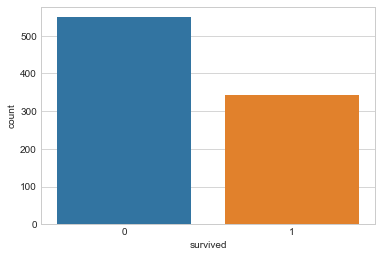

In [179]:
# Look at our target class distribution
sns.countplot(data=df, x='survived')

In [180]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [181]:
# Baseline
df["survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

# Selecting Feature-Set & Traget-Set 

In [182]:
# Create X, y train and validation sets

target = "survived"

# feature set --> everything except for survived --> X_train
# target set/column --> survived --> y_train

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [183]:
# feature set 
X_train.head()

,pclass,age,sibsp,parch,fare
472,2,33.0,1,2,27.7500
483,3,63.0,0,0,9.5875
9,2,14.0,1,0,30.0708
769,3,32.0,0,0,8.3625
743,3,24.0,1,0,16.1000


In [184]:
# Target set 
y_train.head()

472    1
483    1
9      1
769    0
743    0
Name: survived, dtype: int64

# Logistic Regression Model 

In [186]:
# Applying the Logistic Regression model 

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.score(X_val, y_val)

0.6785714285714286

In [187]:
pd.concat([X_train, y_train], axis = 1)

,pclass,age,sibsp,parch,fare,survived
472,2,33.0,1,2,27.7500,1
483,3,63.0,0,0,9.5875,1
9,2,14.0,1,0,30.0708,1
769,3,32.0,0,0,8.3625,0
743,3,24.0,1,0,16.1000,0
...,...,...,...,...,...,...
79,3,30.0,0,0,12.4750,1
164,3,1.0,4,1,39.6875,0
117,2,29.0,1,0,21.0000,0
8,3,27.0,0,2,11.1333,1


In [197]:
cost_func = confusion_matrix(y_train, lr.predict(X_train), labels=[0,1])
# TN, FP, FN, TP
cost_func

array([[233,  40],
       [ 98,  89]])

## Feature Scaling


In [192]:
# First - Standard Scaler

# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data --> only numeric columns 
# Only applied for the feature set "numerical columns only"
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Look at the transformed data
X_train_scaled[:5]

array([[-0.32527937,  0.27832459,  0.44202808,  1.84278748, -0.14147121],
       [ 0.87174872,  2.36218019, -0.5746365 , -0.50211498, -0.47100999],
       [-0.32527937, -1.04145063,  0.44202808, -0.50211498, -0.09936282],
       [ 0.87174872,  0.20886273, -0.5746365 , -0.50211498, -0.49323628],
       [ 0.87174872, -0.34683209,  0.44202808, -0.50211498, -0.35284777]])

In [193]:
# Train the model with Standard Scaler
lr2 = LogisticRegression()

lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_val)

0.6785714285714286

In [198]:
cost_func = confusion_matrix(y_train, lr2.predict(X_train), labels=[0,1])
# TN, FP, FN, TP
cost_func

array([[251,  22],
       [129,  58]])

In [194]:
# Second - Robust Scaler

# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_val)

# Look at the transformed data
X_train_robust[:5]

array([[-0.8       ,  0.29411765,  1.        ,  2.        ,  0.53035244],
       [ 0.        ,  2.05882353,  0.        ,  0.        , -0.24790145],
       [-0.8       , -0.82352941,  1.        ,  0.        ,  0.62979754],
       [ 0.        ,  0.23529412,  0.        ,  0.        , -0.30039207],
       [ 0.        , -0.23529412,  1.        ,  0.        ,  0.03115587]])

In [195]:
# Train the model with Robust Scaler
lr3 = LogisticRegression()

lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_val)

0.6785714285714286

In [199]:
cost_func = confusion_matrix(y_train, lr3.predict(X_train), labels=[0,1])
# TN, FP, FN, TP
cost_func

array([[270,   3],
       [175,  12]])

In [131]:
# Third - MinMax Scaler

# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_val)

# Look at the transformed data
X_train_mm[:5]

array([[0.5       , 0.40939935, 0.2       , 0.33333333, 0.05416439],
       [1.        , 0.78637849, 0.        , 0.        , 0.01871355],
       [0.5       , 0.17064589, 0.2       , 0.        , 0.05869429],
       [1.        , 0.39683338, 0.        , 0.        , 0.01632251],
       [1.        , 0.2963056 , 0.2       , 0.        , 0.03142511]])

In [132]:
# Train the model with MinMax Scaler
lr4 = LogisticRegression()

lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_val)

0.6785714285714286

In [200]:
cost_func = confusion_matrix(y_train, lr4.predict(X_train), labels=[0,1])
# TN, FP, FN, TP
cost_func

array([[236,  37],
       [117,  70]])

# Compare the results between validation and test cost functions 

In [ ]:
lr = array([[233,  40],
       [ 98,  89]])
# --> this model has the least FN (98) which is predi that the person has not survived while they survived. 

lr2 = array([[251,  22],
       [129,  58]])

lr3 = array([[270,   3],
       [175,  12]])
# --> this model has the least FP (3) which is predi that the person has survived while they didn't. 


lr4 = array([[236,  37],
       [117,  70]])

# All of the models have the same accuracy score 

# Feature Engineering

In [93]:
# Create our One Hot Encoder object ()

one_hot = OneHotEncoder()

col_names = ["class", "sex"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()

one_hot_df_val = one_hot.transform(val[col_names]).toarray()

In [94]:
one_hot.categories_

[array(['First', 'Second', 'Third'], dtype=object),
 array(['female', 'male'], dtype=object)]

In [95]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):     
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['class_First', 'class_Second', 'class_Third', 'sex_female', 'sex_male']

In [96]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["class", "sex"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [97]:
one_hot_df.shape

(569, 5)

In [98]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(569, 5)
(143, 5)


In [99]:
train.describe(exclude="number")

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,569,567,569,569,569,126,567,569,569
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,376,420,326,347,347,46,420,357,335


In [100]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["class", "sex"], axis=1)
val_new = val.merge(oh_df_val, on=val.index).set_index("key_0").drop(["class", "sex"], axis=1)

print(train_new.shape)
print(val_new.shape)

(569, 18)
(143, 18)


In [101]:
train_new.dropna()

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,class_First,class_Second,class_Third,sex_female,sex_male
key_0,,,,,,,,,,,,,,,,,,
544,0,1,50.0,1,0,106.4250,C,man,True,C,Cherbourg,no,False,1.0,0.0,0.0,0.0,1.0
872,0,1,33.0,0,0,5.0000,S,man,True,B,Southampton,no,True,1.0,0.0,0.0,0.0,1.0
177,0,1,50.0,0,0,28.7125,C,woman,False,C,Cherbourg,no,True,1.0,0.0,0.0,1.0,0.0
460,1,1,48.0,0,0,26.5500,S,man,True,E,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0
345,1,2,24.0,0,0,13.0000,S,woman,False,F,Southampton,yes,True,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1,2,1.0,2,1,39.0000,S,child,False,F,Southampton,yes,False,0.0,1.0,0.0,0.0,1.0
879,1,1,56.0,0,1,83.1583,C,woman,False,C,Cherbourg,yes,False,1.0,0.0,0.0,1.0,0.0
862,1,1,48.0,0,0,25.9292,S,woman,False,D,Southampton,yes,True,1.0,0.0,0.0,1.0,0.0


In [102]:
train_new

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,class_First,class_Second,class_Third,sex_female,sex_male
key_0,,,,,,,,,,,,,,,,,,
517,0,3,NaN,0,0,24.1500,Q,man,True,NaN,Queenstown,no,True,0.0,0.0,1.0,0.0,1.0
792,0,3,NaN,8,2,69.5500,S,woman,False,NaN,Southampton,no,False,0.0,0.0,1.0,1.0,0.0
472,1,2,33.0,1,2,27.7500,S,woman,False,NaN,Southampton,yes,False,0.0,1.0,0.0,1.0,0.0
483,1,3,63.0,0,0,9.5875,S,woman,False,NaN,Southampton,yes,True,0.0,0.0,1.0,1.0,0.0
9,1,2,14.0,1,0,30.0708,C,child,False,NaN,Cherbourg,yes,False,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1,3,30.0,0,0,12.4750,S,woman,False,NaN,Southampton,yes,True,0.0,0.0,1.0,1.0,0.0
164,0,3,1.0,4,1,39.6875,S,child,False,NaN,Southampton,no,False,0.0,0.0,1.0,0.0,1.0
117,0,2,29.0,1,0,21.0000,S,man,True,NaN,Southampton,no,False,0.0,1.0,0.0,0.0,1.0


In [105]:
train_new.dtypes

survived          int64
pclass            int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
who              object
adult_male         bool
deck             object
embark_town      object
alive            object
alone              bool
class_First     float64
class_Second    float64
class_Third     float64
sex_female      float64
sex_male        float64
dtype: object

In [103]:
# Creating the feature set and the traget set for both the training and the validation 

target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [ ]:
lr5 = LogisticRegression()

lr5.fit(X_train, y_train)
lr5.score(X_val, y_val)